# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

import datetime


pd.set_option('display.max_columns', None)

In [183]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [184]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [186]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [187]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


No nan data. Needs no clean up. Need to think on best way to encode string columns.

Notable observations: Average age is 40. Most of the people are new contacts for the campaign. Average of 2.6 contacts.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The business objective is to understand and determine which characteristics of a customer and campaign most likely contribute to subscribing to a term deposit and in turn future products.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [ ]:
# cols_to_drop = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
tmp_df = df
tmp_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
tmp_df = tmp_df.replace('unknown', pd.NA)

In [190]:
tmp_df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [191]:
tmp_df.dropna(inplace = True)

In [192]:
tmp_df['y'] = tmp_df['y'].map({"yes": 1, "no": 0})


In [ ]:

fig = px.histogram(tmp_df, x='y')
fig.show()


In [194]:
ohe_cols = ['marital', 'housing', 'loan', 'contact', 'poutcome']
ordinal_cols = ['job', 'education', 'month', 'day_of_week']
num_features = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','y']

enc = OneHotEncoder(sparse_output = False)
temp = enc.fit_transform(tmp_df[ohe_cols])
ohc_df = pd.DataFrame(temp, columns = enc.get_feature_names_out())
ohc_df.reset_index(drop=True, inplace=True)
ohc_df


,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30483,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
30484,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
30485,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
30486,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [195]:
ordinalEnc = OrdinalEncoder()
tempp = ordinalEnc.fit_transform(tmp_df[ordinal_cols])
tempp
ord_df = pd.DataFrame(tempp, columns = ordinalEnc.get_feature_names_out())
ord_df.reset_index(drop=True, inplace=True)
ord_df

,job,education,month,day_of_week
0,3.0,0.0,6.0,1.0
1,7.0,3.0,6.0,1.0
2,0.0,1.0,6.0,1.0
3,7.0,3.0,6.0,1.0
4,0.0,5.0,6.0,1.0
...,...,...,...,...
30483,5.0,5.0,7.0,0.0
30484,1.0,5.0,7.0,0.0
30485,5.0,6.0,7.0,0.0
30486,9.0,5.0,7.0,0.0


In [196]:
tmp_df[['age', 'campaign', 'pdays', 'previous']]

,age,campaign,pdays,previous
0,56,1,999,0
2,37,1,999,0
3,40,1,999,0
4,56,1,999,0
6,59,1,999,0
...,...,...,...,...
41183,73,1,999,0
41184,46,1,999,0
41185,56,2,999,0
41186,44,1,999,0


In [197]:
combine_df = pd.concat([tmp_df[num_features].reset_index(), ohc_df, ord_df], axis=1)
combine_df

,index,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,job,education,month,day_of_week
0,0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,6.0,1.0
1,2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,7.0,3.0,6.0,1.0
2,3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,6.0,1.0
3,4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,7.0,3.0,6.0,1.0
4,6,59,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,5.0,7.0,0.0
30484,41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,5.0,7.0,0.0
30485,41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,6.0,7.0,0.0
30486,41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,9.0,5.0,7.0,0.0


<Axes: >

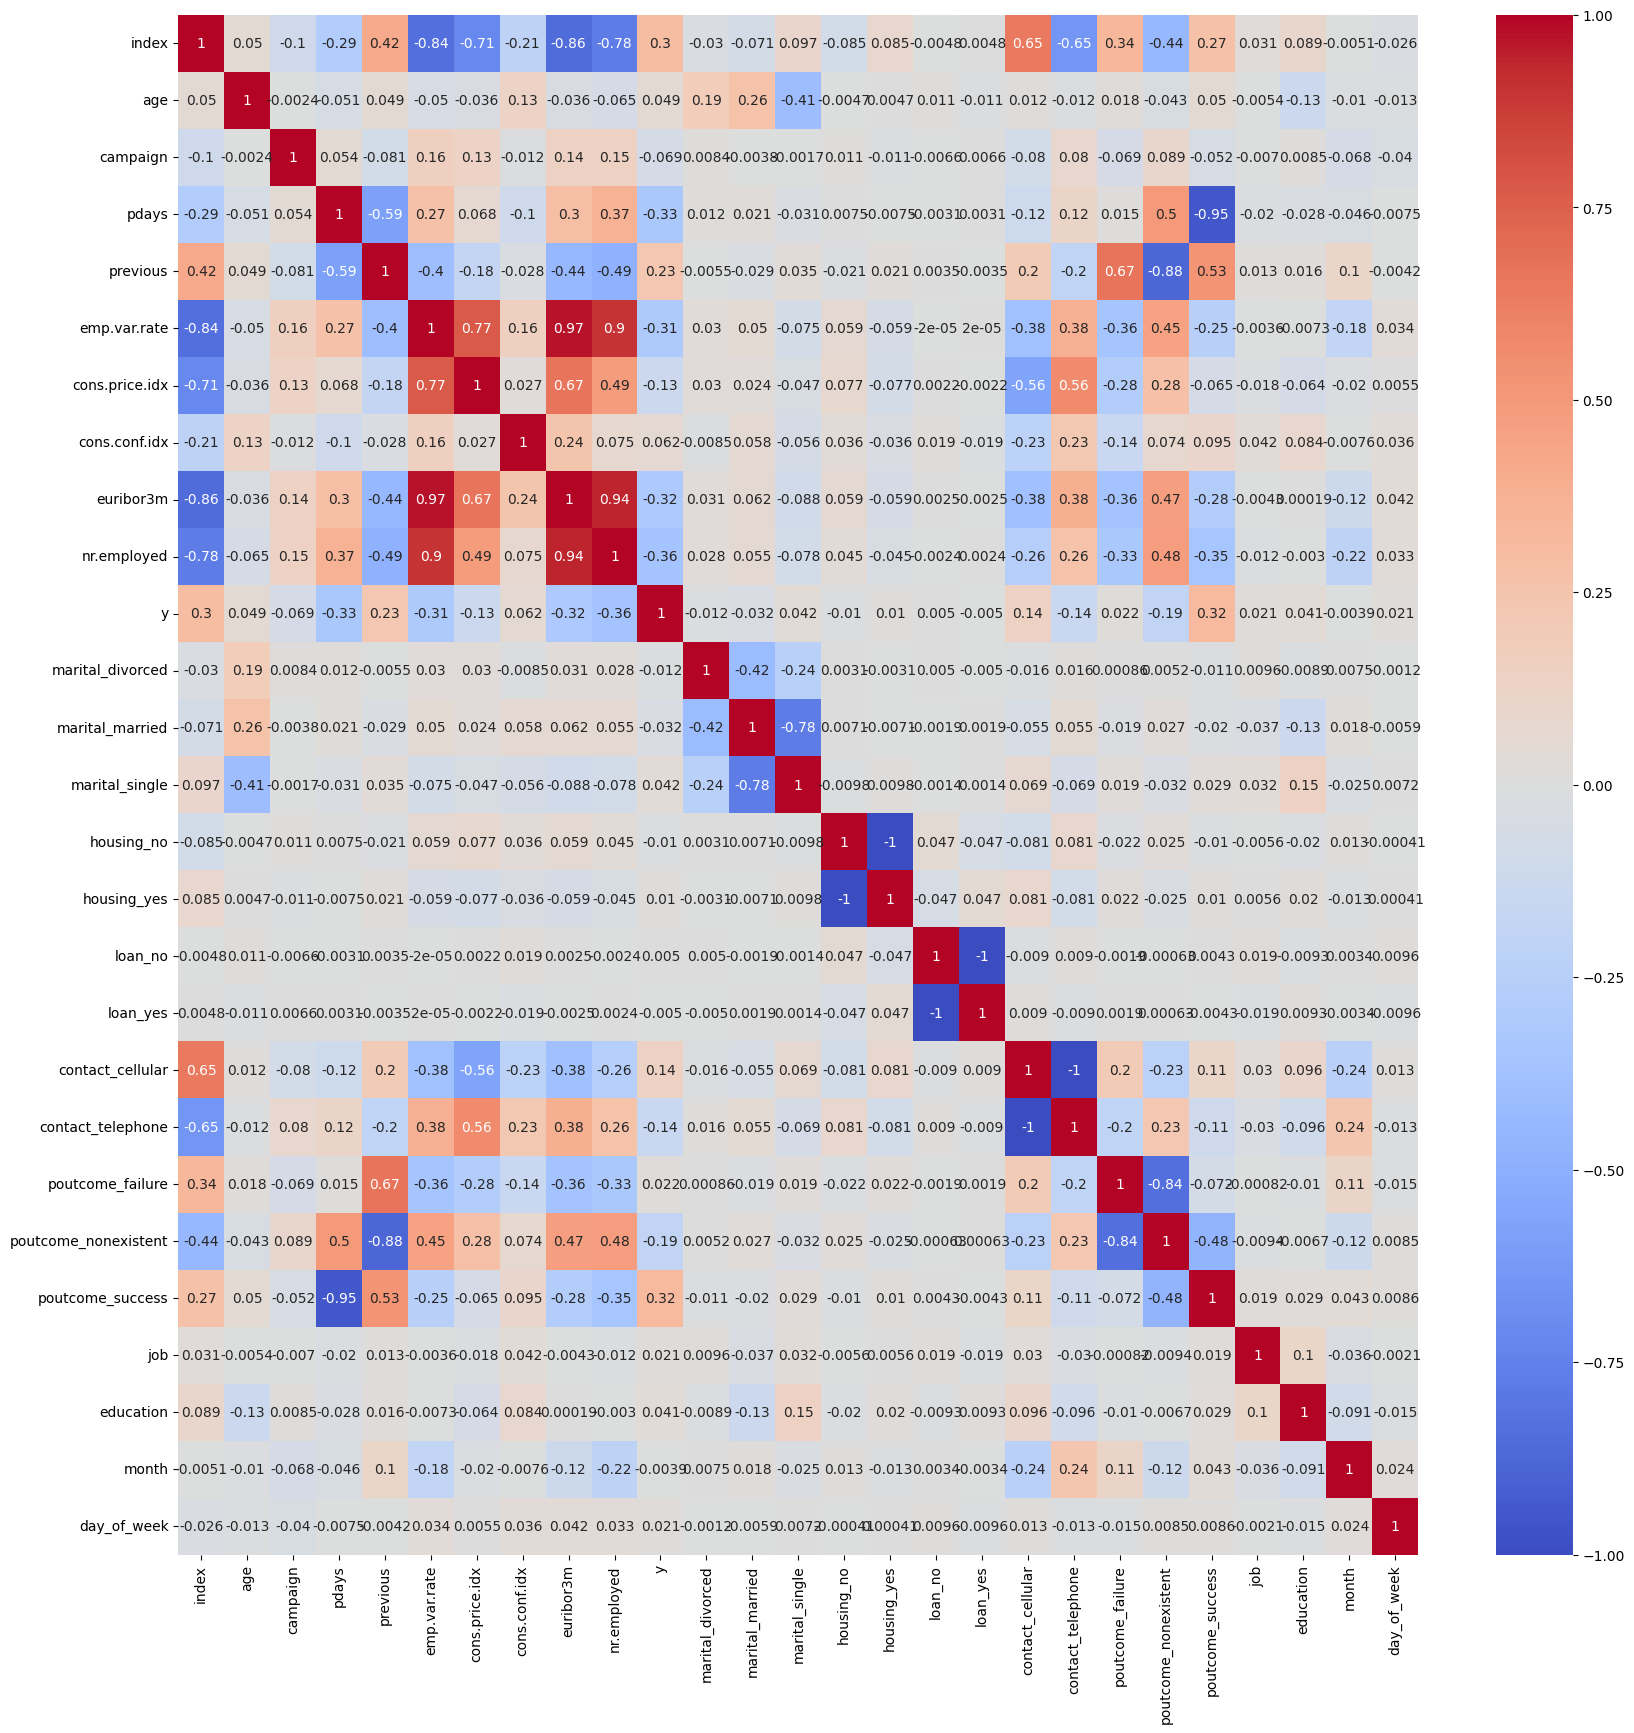

In [198]:
plt.figure(figsize = (20, 20))
sns.heatmap(combine_df.corr(), annot=True, cmap='coolwarm')

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [199]:
X = combine_df.drop(columns=['y'])
y = combine_df['y']

In [200]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [201]:
y_train.value_counts(normalize=True)

y
0    0.874334
1    0.125666
Name: proportion, dtype: float64

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [204]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

pipe = Pipeline([('scaler', StandardScaler()),
                     ('log_reg', LogisticRegression())])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)
y_pred = model.predict(X_test)

c:\Users\Terrence\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [205]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# from sklearn.metrics import mean_squared_error
# from sklearn.linear_model import LinearRegression, Lasso, Ridge

pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 1, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('log_reg', LogisticRegression())])
pipe.fit(X_train, y_train)
logreg_coefs = pipe.named_steps['log_reg'].coef_
logreg_coefs[0]

array([ 0.1956284 ,  0.04750853, -0.09233314, -0.23703099, -0.06263577,
       -1.16715998,  0.4013235 ,  0.05824979,  0.97755264, -0.76910415,
       -0.02052234, -0.01793299,  0.03346167,  0.01295446, -0.01295446,
       -0.00895912,  0.00895912,  0.13091118, -0.13091118, -0.10001447,
        0.04277013,  0.08418304,  0.00455048,  0.0643838 , -0.22104144,
        0.09709962])

In [206]:
# lasso_train_mse = mean_squared_error(y_train, pipe.predict(X_train))
# lasso_test_mse = mean_squared_error(y_test, pipe.predict(X_test))
# print(lasso_train_mse)
# print(lasso_test_mse)

In [207]:
feature_names = pipe.named_steps['polyfeatures'].get_feature_names_out()
lasso_df = pd.DataFrame({'feature': feature_names, 'coef': logreg_coefs[0]})
lasso_df.sort_values('coef', key=abs, ascending=False)

,feature,coef
5,emp.var.rate,-1.167160
8,euribor3m,0.977553
9,nr.employed,-0.769104
6,cons.price.idx,0.401324
3,pdays,-0.237031
24,month,-0.221041
0,index,0.195628
17,contact_cellular,0.130911
18,contact_telephone,-0.130911
19,poutcome_failure,-0.100014


### Problem 9: Score the Model

What is the accuracy of your model?

In [208]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8837323712692686
Confusion Matrix:
 [[5238   66]
 [ 643  151]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      5304
           1       0.70      0.19      0.30       794

    accuracy                           0.88      6098
   macro avg       0.79      0.59      0.62      6098
weighted avg       0.87      0.88      0.85      6098



In [209]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

y_pred = pipe.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      5849
           1       0.22      0.71      0.34       249

    accuracy                           0.89      6098
   macro avg       0.60      0.80      0.64      6098
weighted avg       0.96      0.89      0.91      6098



In [210]:
y_pred_prob = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
result_array_log = [{'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'model':'Log Reg'}]

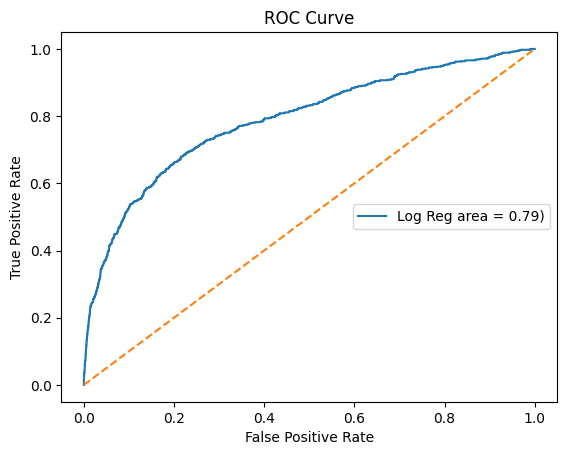

In [211]:
def show_roc_plot(array):
    fig = plt.figure()
    for ar in array:
        plt.plot(ar['fpr'], ar['tpr'], label=f'{ar['model']} area = {ar['roc_auc']:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve')
    plt.legend(loc='right')
    plt.show()

show_roc_plot(result_array_log)

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [212]:
knn_pipe = Pipeline([('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

dt_pipe = Pipeline([('scaler', StandardScaler()),
    ('decision_tree', DecisionTreeClassifier(random_state = 42))
])

svm_pipe = Pipeline([('scaler', StandardScaler()),
    ('svc', SVC(random_state = 42))
])


pipe_map = {'knn': knn_pipe, 'decision_tree': dt_pipe, 'svc': svm_pipe}
train_time = {}
train_accuracy = {}
test_accuracy = {}

for model in ['knn', 'decision_tree', 'svc']:
    dt = datetime.datetime.now()
    seconds = dt.timestamp()
    pipe_map[model].fit(X_train, y_train)
    dt_end = datetime.datetime.now()
    seconds_end = dt_end.timestamp()
    train_time[model] = seconds_end - seconds
    train_accuracy[model] = pipe_map[model].score(X_train, y_train)
    test_accuracy[model] = pipe_map[model].score(X_test, y_test)

In [213]:
# dt = datetime.datetime.now()
# seconds = dt.timestamp()
# seconds

In [214]:
results = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree', 'SVM'],
    'Train Time': np.array(train_time.values()),
    'Train Accuracy': list(train_accuracy.values()),
    'Test Accuracy': list(test_accuracy.values())
})
results

,Model,Train Time,Train Accuracy,Test Accuracy
0,KNN,0.025003,0.904059,0.876353
1,Decision Tree,0.189014,1.000000,0.822729
2,SVM,31.915001,0.894670,0.884880


In [215]:
pipe_map['svc'].decision_function(X_test)

array([-1.00274973, -1.00151387, -0.99889057, ..., -1.00780686,
       -1.0008734 , -1.03842251])

In [216]:
# roc_dict = {}
# roc_auc_dict = {}

# for analysis in ['knn', 'decision_tree', 'svc']:
#     if analysis == 'svc':
#         y_pred_prob = pipe_map[analysis].decision_function(X_test) 
#     else:
#         y_pred_prob = pipe_map[analysis].predict_proba(X_test)[:, 1]
#     roc_dict[analysis] = roc_curve(y_test, y_pred_prob)
#     roc_auc_dict[analysis] = roc_auc_score(y_test, y_pred_prob)

In [ ]:
# result_array_log = [{'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'model':'Log Reg'}]
roc_curves = {}
result_array = []
for name, model in pipe_map.items():
    if name == 'svc':
        y_pred_prob = model.decision_function(X_test)
    else:
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    obj = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'model': name}
    result_array.append(obj)
result_array


[{'fpr': array([0.        , 0.00245098, 0.01168929, 0.03129713, 0.09162896,
         0.3142911 , 1.        ]),
  'tpr': array([0.        , 0.05793451, 0.14231738, 0.25944584, 0.43324937,
         0.64987406, 1.        ]),
  'roc_auc': 0.7120825829847537,
  'model': 'knn'},
 {'fpr': array([0.       , 0.1061463, 1.       ]),
  'tpr': array([0.        , 0.34760705, 1.        ]),
  'roc_auc': 0.6207303741105046,
  'model': 'decision_tree'},
 {'fpr': array([0.00000000e+00, 0.00000000e+00, 1.88536953e-04, ...,
         9.99434389e-01, 9.99434389e-01, 1.00000000e+00]),
  'tpr': array([0.        , 0.00125945, 0.00125945, ..., 0.99874055, 1.        ,
         1.        ]),
  'roc_auc': 0.691030675009783,
  'model': 'svc'}]

In [218]:
result_array = result_array + result_array_log
result_array

[{'fpr': array([0.        , 0.00245098, 0.01168929, 0.03129713, 0.09162896,
         0.3142911 , 1.        ]),
  'tpr': array([0.        , 0.05793451, 0.14231738, 0.25944584, 0.43324937,
         0.64987406, 1.        ]),
  'roc_auc': 0.7120825829847537,
  'model': 'knn'},
 {'fpr': array([0.       , 0.1061463, 1.       ]),
  'tpr': array([0.        , 0.34760705, 1.        ]),
  'roc_auc': 0.6207303741105046,
  'model': 'decision_tree'},
 {'fpr': array([0.00000000e+00, 0.00000000e+00, 1.88536953e-04, ...,
         9.99434389e-01, 9.99434389e-01, 1.00000000e+00]),
  'tpr': array([0.        , 0.00125945, 0.00125945, ..., 0.99874055, 1.        ,
         1.        ]),
  'roc_auc': 0.691030675009783,
  'model': 'svc'},
 {'fpr': array([0.        , 0.        , 0.        , ..., 0.99113876, 0.99113876,
         1.        ]),
  'tpr': array([0.        , 0.00125945, 0.01763224, ..., 0.99874055, 1.        ,
         1.        ]),
  'roc_auc': 0.7889288441592486,
  'model': 'Log Reg'}]

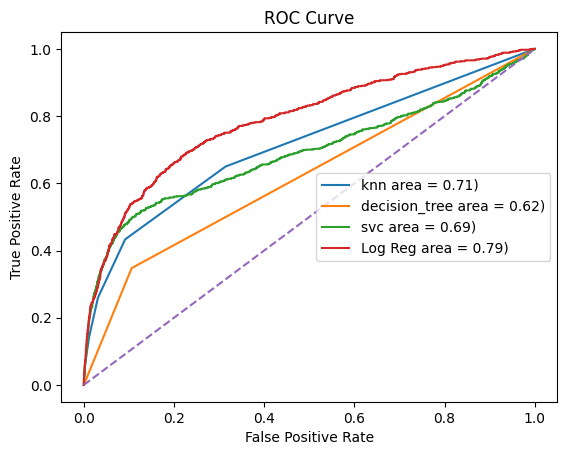

In [219]:
show_roc_plot(result_array)

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [268]:
knn_pipe = KNeighborsClassifier()

dt_pipe = DecisionTreeClassifier(random_state = 42)
svm_pipe = SVC(random_state = 42)

log_pipe = LogisticRegression()


pipe_map2 = {'log_reg': log_pipe,'knn': knn_pipe, 'decision_tree': dt_pipe, 'svc': svm_pipe, }

In [278]:
def hyperparameter_tuning(X_train, X_test, y_train, y_test):
    results = []
    confusion_matrices = []
    roc_curves = []

    param_grids = {
        'log_reg': {'C': [0.1, 1, 10, 100]},
        'knn': {'n_neighbors': list(range(100, 200))},
        'decision_tree': {'max_depth': [5, 10, 50, 100]},
        'svc': {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 1, 10, 100], 
              'kernel': ['rbf']} 
    }

    for name, model in pipe_map2.items():
        param_grid = param_grids[name]
        grid_search = Pipeline([('scaler', StandardScaler()),
                                ('gs', GridSearchCV(model, param_grid=param_grid, cv=5))
        ])
        # grid_search = GridSearchCV(model, param_grid, cv=5)
        dt = datetime.datetime.now()
        seconds = dt.timestamp()
        grid_search.fit(X_train, y_train)
        dt_end = datetime.datetime.now()
        seconds_end = dt_end.timestamp()
        # pipe.named_steps['scaler']
        best_model = grid_search.named_steps['gs'].best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(best_model)
        print(y_pred)
        print(accuracy)
        print(conf_matrix)
        # if hasattr(best_model.named_steps[name], "predict_proba"):
        #     y_prob = best_model.predict_proba(X_test)[:, 1]
        # else:
        #     y_prob = best_model.decision_function(X_test)
        if name == 'svc':
            y_prob = best_model.decision_function(X_test)
        else:
            y_prob = best_model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = roc_auc_score(y_test, y_prob)
        
        results.append({
            'model': name,
            'best_params': grid_search.named_steps['gs'].best_params_,
            'accuracy': accuracy,
            'time': seconds_end - seconds
        })
        confusion_matrices.append({
            'model': name,
            'conf_matrix': conf_matrix
        })
        roc_curves.append({
            'model': name,
            'fpr': fpr,
            'tpr': tpr,
            'roc_auc': roc_auc
        })

    return results, confusion_matrices, roc_curves


In [279]:
results, confusion_matrices, roc_curves = hyperparameter_tuning(X_train, X_test, y_train, y_test)

c:\Users\Terrence\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

c:\Users\Terrence\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



LogisticRegression(C=0.1)
[0 1 1 ... 1 1 0]
0.4793374877008855
[[2248 3056]
 [ 119  675]]


c:\Users\Terrence\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



KNeighborsClassifier(n_neighbors=102)
[0 0 0 ... 0 0 0]
0.8711052804198097
[[5302    2]
 [ 784   10]]


c:\Users\Terrence\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

c:\Users\Terrence\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

c:\Users\Terrence\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



DecisionTreeClassifier(max_depth=5, random_state=42)
[0 0 0 ... 0 0 0]
0.8697933748770088
[[5304    0]
 [ 794    0]]


c:\Users\Terrence\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but SVC was fitted without feature names



SVC(C=1, gamma=0.1, random_state=42)
[0 0 0 ... 0 0 0]
0.8697933748770088
[[5304    0]
 [ 794    0]]


c:\Users\Terrence\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but SVC was fitted without feature names



In [272]:
results_df = pd.DataFrame(results)
results_df

,model,best_params,accuracy,time
0,log_reg,{'C': 0.1},0.479337,1.247017
1,knn,{'n_neighbors': 102},0.871105,142.994986
2,decision_tree,{'max_depth': 5},0.869793,1.486015
3,svc,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.869793,676.946017


In [273]:
roc_curves

[{'model': 'log_reg',
  'fpr': array([0.        , 0.56994721, 0.57352941, 0.57352941, 0.57409502,
         0.57409502, 0.5744721 , 0.5744721 , 0.58955505, 0.58955505,
         0.59087481, 0.59087481, 0.59219457, 0.59219457, 0.59407994,
         0.59407994, 0.59690799, 0.59690799, 0.59803922, 0.59803922,
         0.59822775, 0.59822775, 0.60180995, 0.60180995, 0.60784314,
         0.60784314, 0.60935143, 0.60935143, 0.6112368 , 0.6112368 ,
         0.61689291, 0.61689291, 0.61802413, 0.61802413, 0.61877828,
         0.61877828, 0.6199095 , 0.6199095 , 0.6285822 , 0.6285822 ,
         0.63122172, 0.63122172, 0.6372549 , 0.6372549 , 0.64064857,
         0.64064857, 0.64177979, 0.64177979, 0.64272247, 0.64272247,
         0.64404223, 0.64404223, 0.64441931, 0.64441931, 0.64536199,
         0.64536199, 0.6474359 , 0.6474359 , 0.64762443, 0.64762443,
         0.65648567, 0.65648567, 0.65742836, 0.65742836, 0.65893665,
         0.65893665, 0.66025641, 0.66025641, 0.66138763, 0.66138763,
     

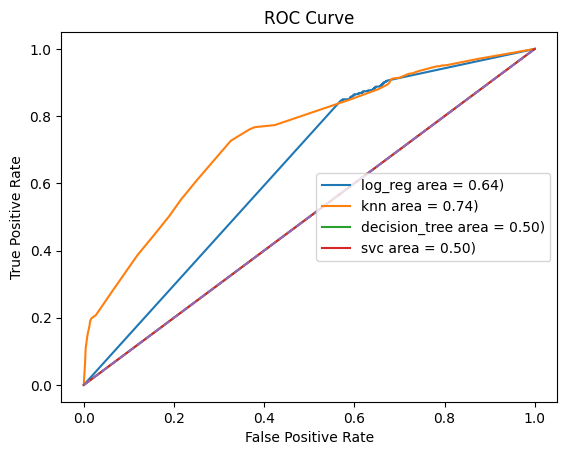

In [274]:
show_roc_plot(roc_curves)

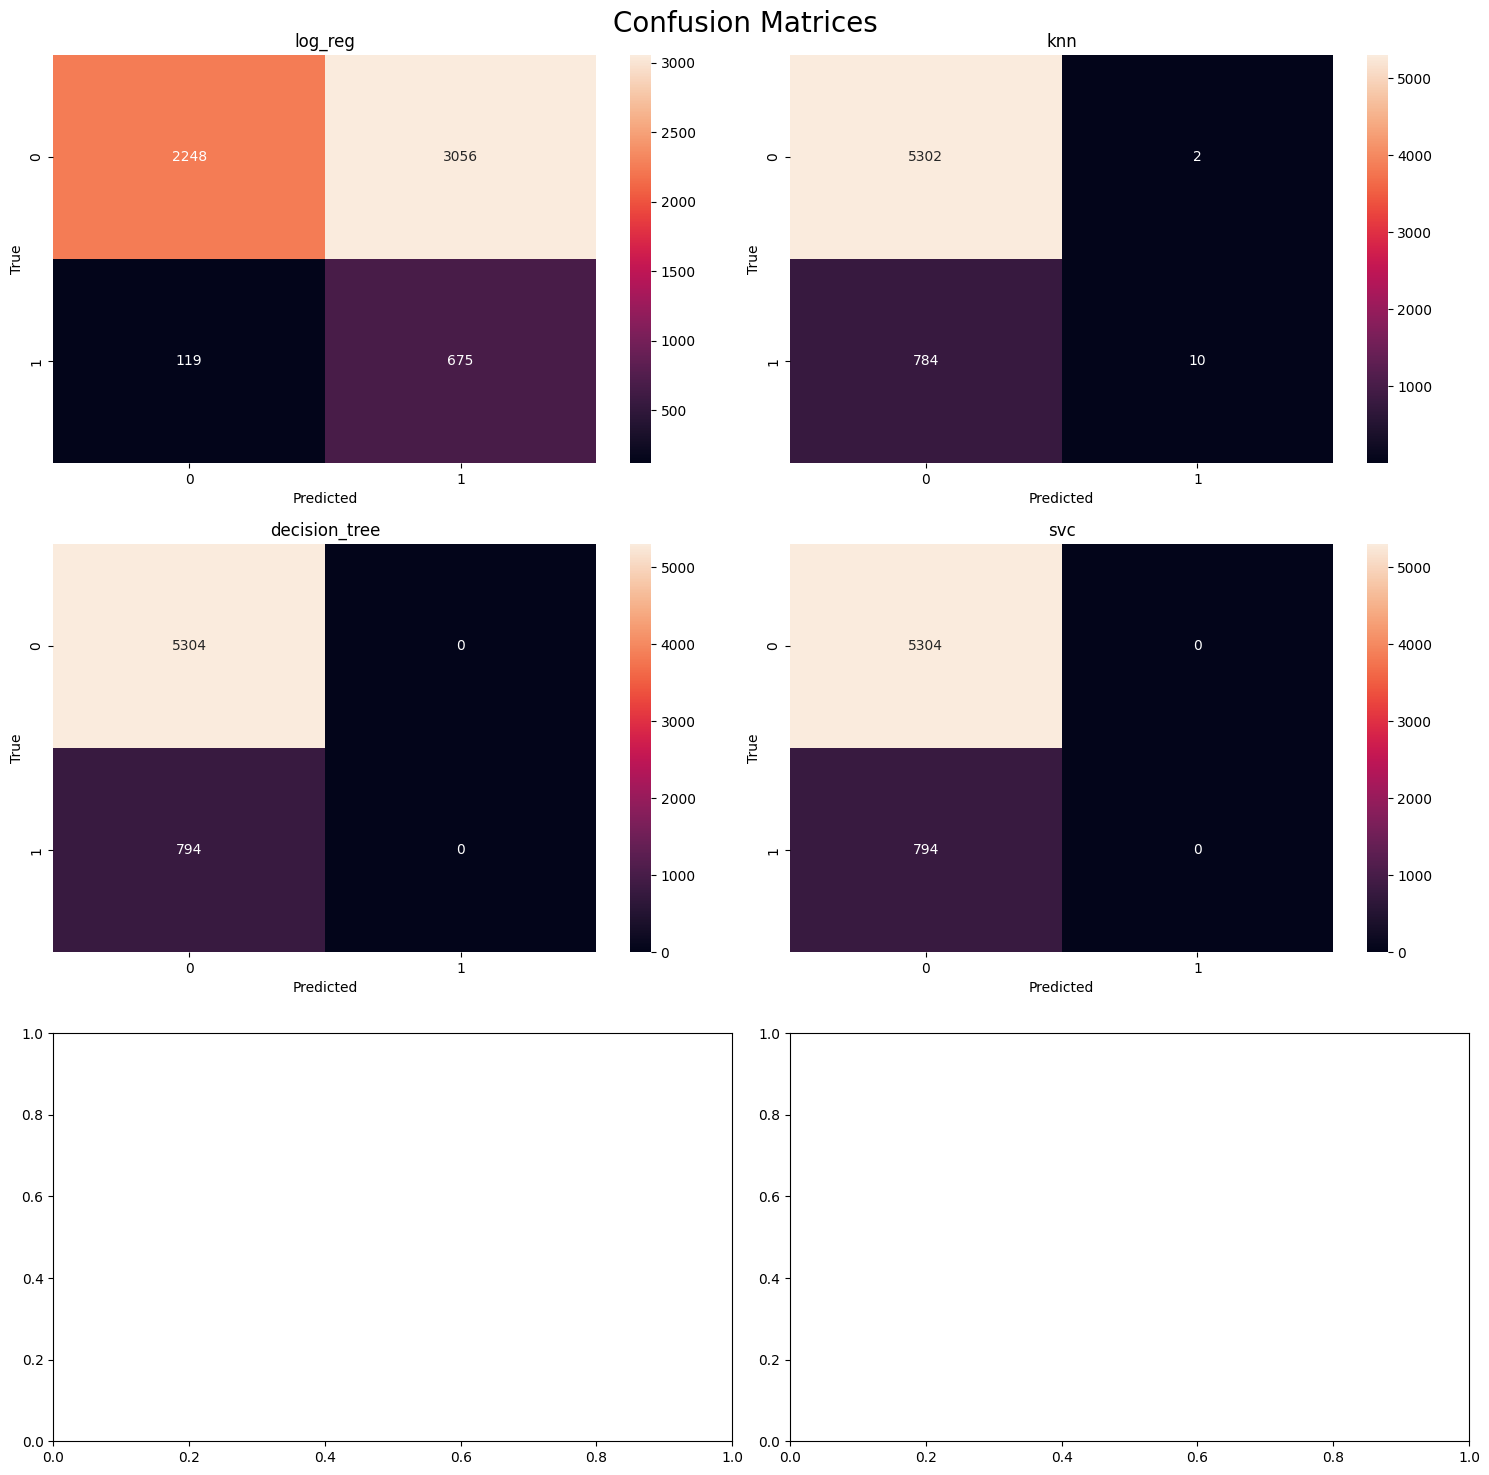

In [ ]:
def plot_confusion_matrices(confusion_matrices, title):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
    fig.suptitle(title, fontsize=20)
    for i, cm in enumerate(confusion_matrices):
        ax = axes[i//2, i%2]
        sns.heatmap(cm['conf_matrix'], annot=True, fmt='d', ax=ax)
        ax.set_title(f"{cm['model']}")
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

plot_confusion_matrices(confusion_matrices, 'Confusion Matrices')

Conclusions:
Logistic Regression: accuracy 88.37
KNN: accuracy 87.64
Decision Tree: accuracy 82.27
SVM: accuracy 88.49

With hyper parameter tuning:
Logistic Regression: 47.93
KNN: 87.11
Decision Tree: 86.98
SVM: 86.98

Variables that have the hightest coefficients
emp.var.rate
euribor3m
nr.employed
cons.price.idx
pdays

##### Questions